In [1]:
import pandas as pd
import numpy as np
import json

## 1. Exploratory Data Analysis

### 1.1 Dataframe preparation

At this step we preprocess the two .mjson files (*homology* and *homology_consensus*) obtained from the MobiDB - a database of protein disorder and mobility annotations. 

First, we define a function *parse_lines*, which we then apply to the files to generate pandas dataframes.

In [2]:
# Create a function parsing rows in the homology files

def parse_lines(line):
    # Add list to be returned
    rows = list()
    # Loop through each item in line
    for key, value in line.items():
        if key == 'acc':
            acc = value
        else:
            evidence, feature, source = key.split('-')
            for k, v in value.items():
                if k == 'regions':
                    for item in range(len(v)):
                        reg = v[item]
                        start, end = reg[0], reg[1]
                        rows.append({
                            'acc': acc, 
                            'evidence': evidence, 
                            'feature': feature,
                            'source': source, 
                            'start': start, 
                            'end': end
                        })

    # Return parsed rows
    return rows

In [3]:
# Open the .mjson files using the function created above

# Initialize rows in dataframe
data = list()
# Open file homology.mjson or homology_consensus.mjson
with open('homology.mjson', 'r') as file:
  # Loop through each line in file
  for line in file:
    # Cast line (JSON) to object
    obj = json.loads(line)
    rows = parse_lines(obj)
    data.extend(rows)

In [4]:
# Convert the list to DataFrame

df = pd.DataFrame(data)
df.head()

,acc,evidence,feature,source,start,end
0,A0A009HC73,homology,conformational_diversity,codnas,1,308
1,A0A009I561,homology,conformational_diversity,codnas,1,308
2,A0A009IUT7,homology,conformational_diversity,codnas,1,308
3,A0A009KQW8,homology,conformational_diversity,codnas,1,304
4,A0A009MPB7,homology,conformational_diversity,codnas,1,308


In [5]:
# Add the length column

df['length'] = df['end'] - df['start'] + 1
df.head()

,acc,evidence,feature,source,start,end,length
0,A0A009HC73,homology,conformational_diversity,codnas,1,308,308
1,A0A009I561,homology,conformational_diversity,codnas,1,308,308
2,A0A009IUT7,homology,conformational_diversity,codnas,1,308,308
3,A0A009KQW8,homology,conformational_diversity,codnas,1,304,304
4,A0A009MPB7,homology,conformational_diversity,codnas,1,308,308


In [21]:
df.acc.unique()

array(['A0A009HC73', 'A0A009I561', 'A0A009IUT7', ..., 'Z4YKX0', 'Z4YNI2',
       'Z4YNM2'], dtype=object)

### 1.2 Data description

We proceed with the exploratory data analysis, using seaborn plots and build-in pandas methods.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Look at the information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031055 entries, 0 to 1031054
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   acc       1031055 non-null  object
 1   evidence  1031055 non-null  object
 2   feature   1031055 non-null  object
 3   source    1031055 non-null  object
 4   start     1031055 non-null  int64 
 5   end       1031055 non-null  int64 
 6   length    1031055 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 55.1+ MB


Below is the description of the variables:

1. **acc**: The UniProt accession code. Combination of letters from A to Z and digits.
2. **evidence**: The type of annotation. Only sequence-based homology inference is presented in each one of the databases.
3. **feature**: The classes of proteins. Here we will focus on one of them: *disorder*.
4. **source**: Database from which the information was retrieved.
5. **start**: Start position of the residue in the sequence.
6. **end**: End position of the residue in the sequence.

The *start* and *end* columns are of integer type, and other 4 columns (*acc*, *evidence*, *feature* and *source*) are objects.

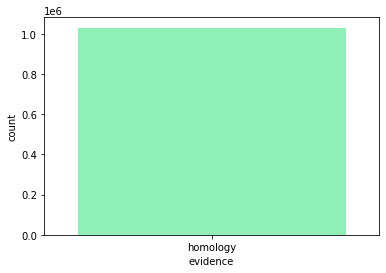

In [14]:
# Create an evidence barplot

sns.countplot(x = df['evidence'], palette='rainbow');

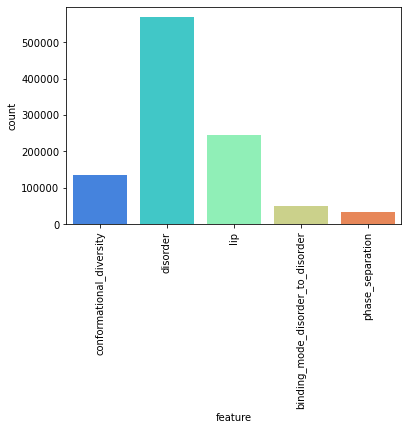

In [15]:
# Create a feature barplot

sns.countplot(x = df['feature'], palette='rainbow')
plt.xticks(rotation=90);

The largest percentage (55.2%) is disordered residues.

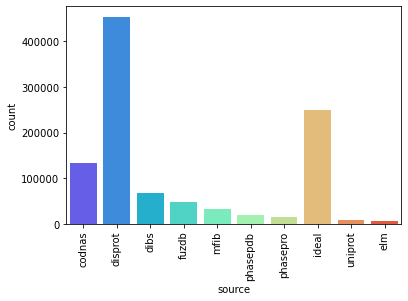

In [16]:
# Create a source barplot (applicable only to 'homology.mjson')

sns.countplot(x = df['source'], palette='rainbow')
plt.xticks(rotation=90);

In [17]:
# Create a dataframe with the only disordered regions

df_dis = df[df['feature'] == 'disorder']
df_dis.head()

,acc,evidence,feature,source,start,end,length
10,A0A010QT17,homology,disorder,disprot,117,130,14
12,A0A010R0B5,homology,disorder,disprot,5,701,697
15,A0A010RTY3,homology,disorder,disprot,225,235,11
31,A0A015L8C2,homology,disorder,disprot,320,333,14
33,A0A015NFB9,homology,disorder,disprot,153,170,18


We continue with the analysis of the newly created column *length* which is the difference between the end and the start positions. 
For this we creating a histogram, and due to the fact we have a heavy tail distribution, we apply the log-scale to the plot.

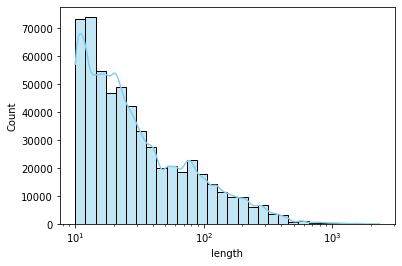

In [18]:
# Create a histogram of the length of disordered regions

sns.histplot(data=df_dis, x='length', bins=30, kde=True, log_scale=True, color='skyblue'); 

The highest 